In [1]:
# 01_data_exploration_and_feature_engineering.ipynb
# DataOrbit - Healthcare Provider Fraud Detection
# Block 1: Basic setup & imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import textwrap
import warnings
warnings.filterwarnings("ignore")

# Plot settings
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True
sns.set(style="whitegrid")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Setup complete.")
print("Numpy:", np.__version__)
print("Pandas:", pd.__version__)
print("Seaborn:", sns.__version__)


Setup complete.
Numpy: 2.0.2
Pandas: 2.2.2
Seaborn: 0.13.2


In [2]:
# Block 2: Load raw data (4 CSV files)

# Expected file names (upload them to the same folder as this notebook in Colab)
beneficiary_file = "/content/Train_Beneficiarydata-1542865627584.csv"
inpatient_file   = "/content/Train_Inpatientdata-1542865627584.csv"
outpatient_file  = "/content/Train_Inpatientdata-1542865627584.csv"
labels_file      = "/content/Train-1542865627584.csv"

def load_csv_safely(path):
    try:
        df = pd.read_csv(path)
        print(f"Loaded {path} with shape {df.shape}")
        return df
    except FileNotFoundError:
        print(f"[ERROR] File not found: {path}.")
        print("➡ Please upload this file or adjust the path.")
        return None

train_beneficiary = load_csv_safely(beneficiary_file)
train_inpatient   = load_csv_safely(inpatient_file)
train_outpatient  = load_csv_safely(outpatient_file)
train_labels      = load_csv_safely(labels_file)

print("\nDone loading (or attempting to load) all datasets.")


Loaded /content/Train_Beneficiarydata-1542865627584.csv with shape (138556, 25)
Loaded /content/Train_Inpatientdata-1542865627584.csv with shape (40474, 30)
Loaded /content/Train_Inpatientdata-1542865627584.csv with shape (40474, 30)
Loaded /content/Train-1542865627584.csv with shape (5410, 2)

Done loading (or attempting to load) all datasets.


In [3]:
# Block 3: Basic inspection of the loaded datasets

import io  # needed for StringIO

def quick_overview(df, name, max_cols=20):
    print("\n" + "="*80)
    print(f"DataFrame: {name}")
    print(f"Shape: {None if df is None else df.shape}")
    print("-"*80)
    if df is None:
        print("[SKIPPED] This DataFrame was not loaded (None).")
        return

    # Show first 5 rows
    print("\nHead:")
    display(df.head())

    # Info summary
    print("\nInfo:")
    buffer = io.StringIO()
    df.info(buf=buffer)
    print(buffer.getvalue())

    # Basic statistics for numeric columns (only if they exist)
    print("\nDescribe (numeric columns):")
    num_cols = df.select_dtypes(include="number")
    if num_cols.shape[1] > 0:
        display(num_cols.describe().T)
    else:
        print("No numeric columns in this DataFrame.")

    # Basic statistics for non-numeric columns
    print("\nDescribe (non-numeric columns):")
    non_num_cols = df.select_dtypes(exclude="number")
    if non_num_cols.shape[1] > 0:
        display(non_num_cols.describe().T)
    else:
        print("No non-numeric columns in this DataFrame.")

    # Count missing values
    print("\nMissing values per column:")
    missing = df.isna().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if missing.empty:
        print("No missing values.")
    else:
        display(missing)

# Run overview for each table
quick_overview(train_beneficiary, "Train_Beneficiarydata")
quick_overview(train_inpatient,   "Train_Inpatientdata")
quick_overview(train_outpatient,  "Train_Outpatientdata")
quick_overview(train_labels,      "Train_Labels")



DataFrame: Train_Beneficiarydata
Shape: (138556, 25)
--------------------------------------------------------------------------------

Head:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCo

,count,mean,std,min,25%,50%,75%,max
Gender,138556.0,1.570932,0.494945,1.0,1.0,2.0,2.0,2.0
Race,138556.0,1.254511,0.717007,1.0,1.0,1.0,1.0,5.0
State,138556.0,25.666734,15.223443,1.0,11.0,25.0,39.0,54.0
County,138556.0,374.424745,266.277581,0.0,141.0,340.0,570.0,999.0
NoOfMonths_PartACov,138556.0,11.907727,1.032332,0.0,12.0,12.0,12.0,12.0
NoOfMonths_PartBCov,138556.0,11.910145,0.936893,0.0,12.0,12.0,12.0,12.0
ChronicCond_Alzheimer,138556.0,1.667817,0.470998,1.0,1.0,2.0,2.0,2.0
ChronicCond_Heartfailure,138556.0,1.506322,0.499962,1.0,1.0,2.0,2.0,2.0
ChronicCond_KidneyDisease,138556.0,1.687643,0.463456,1.0,1.0,2.0,2.0,2.0
ChronicCond_Cancer,138556.0,1.880041,0.324914,1.0,2.0,2.0,2.0,2.0



Describe (non-numeric columns):


,count,unique,top,freq
BeneID,138556,138556,BENE159198,1
DOB,138556,900,1939-10-01,540
DOD,1421,11,2009-12-01,182
RenalDiseaseIndicator,138556,2,0,118978



Missing values per column:


,0
DOD,137135



DataFrame: Train_Inpatientdata
Shape: (40474, 30)
--------------------------------------------------------------------------------

Head:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,4/12/2009,4/18/2009,PRV55912,26000,PHY390922,NaN,NaN,4/12/2009,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,8/31/2009,9/2/2009,PRV55907,5000,PHY318495,PHY318495,NaN,8/31/2009,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,9/17/2009,9/20/2009,PRV56046,5000,PHY372395,NaN,PHY324689,9/17/2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2/14/2009,2/22/2009,PRV52405,5000,PHY369659,PHY392961,PHY349768,2/14/2009,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,8/13/2009,8/30/2009,PRV56614,10000,PHY379376,PHY398258,NaN,8/13/2009,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 n

,count,mean,std,min,25%,50%,75%,max
InscClaimAmtReimbursed,40474.0,10087.884074,10303.099402,0.0,4000.00,7000.0,12000.00,125000.0
DeductibleAmtPaid,39575.0,1068.000000,0.000000,1068.0,1068.00,1068.0,1068.00,1068.0
ClmProcedureCode_1,23148.0,5894.611759,3049.304400,11.0,3848.00,5369.0,8666.25,9999.0
ClmProcedureCode_2,5454.0,4103.738174,2028.182156,42.0,2724.00,4019.0,4439.00,9999.0
ClmProcedureCode_3,965.0,4226.355440,2282.761581,42.0,2724.00,4019.0,5185.00,9999.0
ClmProcedureCode_4,116.0,4070.172414,1994.409802,42.0,2758.75,4019.0,4439.00,9986.0
ClmProcedureCode_5,9.0,5269.444444,2780.071632,2724.0,4139.00,4139.0,5185.00,9982.0
ClmProcedureCode_6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Describe (non-numeric columns):


,count,unique,top,freq
BeneID,40474,31289,BENE134170,8
ClaimID,40474,40474,CLM69948,1
ClaimStartDt,40474,398,2/10/2009,145
ClaimEndDt,40474,365,2/11/2009,153
Provider,40474,2092,PRV52019,516
AttendingPhysician,40362,11604,PHY422134,386
OperatingPhysician,23830,8287,PHY429430,225
OtherPhysician,4690,2877,PHY416093,81
AdmissionDt,40474,398,2/10/2009,144
ClmAdmitDiagnosisCode,40474,1927,78650,1731



Missing values per column:


,0
ClmProcedureCode_6,40474
ClmProcedureCode_5,40465
ClmProcedureCode_4,40358
ClmProcedureCode_3,39509
ClmDiagnosisCode_10,36547
OtherPhysician,35784
ClmProcedureCode_2,35020
ClmProcedureCode_1,17326
OperatingPhysician,16644
ClmDiagnosisCode_9,13497



DataFrame: Train_Outpatientdata
Shape: (40474, 30)
--------------------------------------------------------------------------------

Head:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,4/12/2009,4/18/2009,PRV55912,26000,PHY390922,NaN,NaN,4/12/2009,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,8/31/2009,9/2/2009,PRV55907,5000,PHY318495,PHY318495,NaN,8/31/2009,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,9/17/2009,9/20/2009,PRV56046,5000,PHY372395,NaN,PHY324689,9/17/2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2/14/2009,2/22/2009,PRV52405,5000,PHY369659,PHY392961,PHY349768,2/14/2009,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,8/13/2009,8/30/2009,PRV56614,10000,PHY379376,PHY398258,NaN,8/13/2009,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 n

,count,mean,std,min,25%,50%,75%,max
InscClaimAmtReimbursed,40474.0,10087.884074,10303.099402,0.0,4000.00,7000.0,12000.00,125000.0
DeductibleAmtPaid,39575.0,1068.000000,0.000000,1068.0,1068.00,1068.0,1068.00,1068.0
ClmProcedureCode_1,23148.0,5894.611759,3049.304400,11.0,3848.00,5369.0,8666.25,9999.0
ClmProcedureCode_2,5454.0,4103.738174,2028.182156,42.0,2724.00,4019.0,4439.00,9999.0
ClmProcedureCode_3,965.0,4226.355440,2282.761581,42.0,2724.00,4019.0,5185.00,9999.0
ClmProcedureCode_4,116.0,4070.172414,1994.409802,42.0,2758.75,4019.0,4439.00,9986.0
ClmProcedureCode_5,9.0,5269.444444,2780.071632,2724.0,4139.00,4139.0,5185.00,9982.0
ClmProcedureCode_6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Describe (non-numeric columns):


,count,unique,top,freq
BeneID,40474,31289,BENE134170,8
ClaimID,40474,40474,CLM69948,1
ClaimStartDt,40474,398,2/10/2009,145
ClaimEndDt,40474,365,2/11/2009,153
Provider,40474,2092,PRV52019,516
AttendingPhysician,40362,11604,PHY422134,386
OperatingPhysician,23830,8287,PHY429430,225
OtherPhysician,4690,2877,PHY416093,81
AdmissionDt,40474,398,2/10/2009,144
ClmAdmitDiagnosisCode,40474,1927,78650,1731



Missing values per column:


,0
ClmProcedureCode_6,40474
ClmProcedureCode_5,40465
ClmProcedureCode_4,40358
ClmProcedureCode_3,39509
ClmDiagnosisCode_10,36547
OtherPhysician,35784
ClmProcedureCode_2,35020
ClmProcedureCode_1,17326
OperatingPhysician,16644
ClmDiagnosisCode_9,13497



DataFrame: Train_Labels
Shape: (5410, 2)
--------------------------------------------------------------------------------

Head:


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


Describe (numeric columns):
No numeric columns in this DataFrame.

Describe (non-numeric columns):


,count,unique,top,freq
Provider,5410,5410,PRV57763,1
PotentialFraud,5410,2,No,4904



Missing values per column:
No missing values.



Candidate key columns in Train_Beneficiarydata:
- BeneID: 138556 unique values out of 138556 rows
- ChronicCond_KidneyDisease: 2 unique values out of 138556 rows
- ChronicCond_rheumatoidarthritis: 2 unique values out of 138556 rows

Candidate key columns in Train_Inpatientdata:
- BeneID: 31289 unique values out of 40474 rows
- ClaimID: 40474 unique values out of 40474 rows
- Provider: 2092 unique values out of 40474 rows
- DeductibleAmtPaid: 1 unique values out of 40474 rows

Candidate key columns in Train_Outpatientdata:
- BeneID: 31289 unique values out of 40474 rows
- ClaimID: 40474 unique values out of 40474 rows
- Provider: 2092 unique values out of 40474 rows
- DeductibleAmtPaid: 1 unique values out of 40474 rows

Candidate key columns in Train_Labels:
- Provider: 5410 unique values out of 5410 rows

Label distribution (fraud vs non-fraud):
Using label column: PotentialFraud

Counts:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

Proportions:
PotentialFraud
No

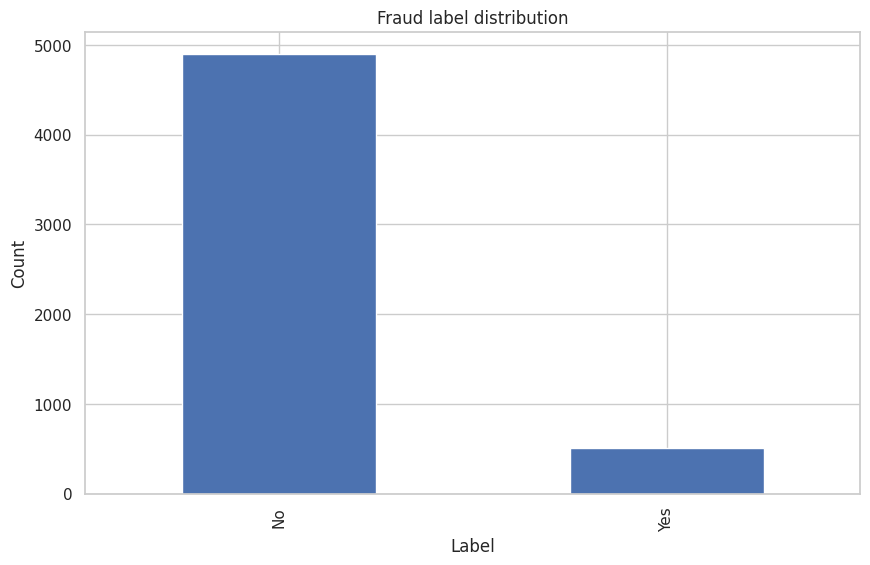

In [4]:
# Block 4: Keys and label distribution

def list_candidate_keys(df, name):
    print("\n" + "="*80)
    print(f"Candidate key columns in {name}:")
    if df is None:
        print("[SKIPPED] DataFrame not loaded.")
        return

    cols = df.columns
    key_like = [c for c in cols if "id" in c.lower() or "provider" in c.lower()]
    if not key_like:
        print("No obvious key-like columns found.")
        print("Columns:", list(cols))
        return

    for col in key_like:
        uniq = df[col].nunique()
        total = len(df)
        print(f"- {col}: {uniq} unique values out of {total} rows")

# Inspect keys in each table
list_candidate_keys(train_beneficiary, "Train_Beneficiarydata")
list_candidate_keys(train_inpatient,   "Train_Inpatientdata")
list_candidate_keys(train_outpatient,  "Train_Outpatientdata")
list_candidate_keys(train_labels,      "Train_Labels")

# Label distribution
if train_labels is not None:
    print("\n" + "="*80)
    print("Label distribution (fraud vs non-fraud):")

    # Try to detect the label column automatically
    label_col = None
    for c in train_labels.columns:
        if "fraud" in c.lower() or "label" in c.lower() or "target" in c.lower():
            label_col = c
            break

    if label_col is None:
        print("Could not automatically detect label column. Columns are:")
        print(list(train_labels.columns))
    else:
        print(f"Using label column: {label_col}")
        label_counts = train_labels[label_col].value_counts(dropna=False)
        label_ratios = train_labels[label_col].value_counts(normalize=True, dropna=False)

        print("\nCounts:")
        print(label_counts)
        print("\nProportions:")
        print(label_ratios)

        # Simple bar plot
        plt.figure()
        label_counts.plot(kind="bar")
        plt.title("Fraud label distribution")
        plt.xlabel("Label")
        plt.ylabel("Count")
        plt.show()


In [5]:
# Block 5: Key statistics per table and per provider

def table_key_summary(df, name):
    print("\n" + "="*80)
    print(f"Table key summary: {name}")
    if df is None:
        print("[SKIPPED] DataFrame not loaded.")
        return

    cols = df.columns

    # Basic counts for common key-like columns
    key_candidates = ["Provider", "BeneID", "ClaimID"]
    for key in key_candidates:
        if key in cols:
            n_unique = df[key].nunique()
            print(f"- {key}: {n_unique} unique values (out of {len(df)} rows)")

    # Show a quick value_count for Provider if it exists
    if "Provider" in cols:
        print("\nTop 10 providers by number of rows in this table:")
        display(df["Provider"].value_counts().head(10))


# Apply to each table
table_key_summary(train_beneficiary, "Train_Beneficiarydata")
table_key_summary(train_inpatient,   "Train_Inpatientdata")
table_key_summary(train_outpatient,  "Train_Outpatientdata")
table_key_summary(train_labels,      "Train_Labels")



Table key summary: Train_Beneficiarydata
- BeneID: 138556 unique values (out of 138556 rows)

Table key summary: Train_Inpatientdata
- Provider: 2092 unique values (out of 40474 rows)
- BeneID: 31289 unique values (out of 40474 rows)
- ClaimID: 40474 unique values (out of 40474 rows)

Top 10 providers by number of rows in this table:


,count
Provider,
PRV52019,516
PRV55462,386
PRV54367,322
PRV53706,282
PRV55209,275
PRV56560,248
PRV54742,231
PRV55230,225
PRV52340,224



Table key summary: Train_Outpatientdata
- Provider: 2092 unique values (out of 40474 rows)
- BeneID: 31289 unique values (out of 40474 rows)
- ClaimID: 40474 unique values (out of 40474 rows)

Top 10 providers by number of rows in this table:


,count
Provider,
PRV52019,516
PRV55462,386
PRV54367,322
PRV53706,282
PRV55209,275
PRV56560,248
PRV54742,231
PRV55230,225
PRV52340,224



Table key summary: Train_Labels
- Provider: 5410 unique values (out of 5410 rows)

Top 10 providers by number of rows in this table:


,count
Provider,
PRV57763,1
PRV51001,1
PRV57744,1
PRV57743,1
PRV57742,1
PRV57741,1
PRV57740,1
PRV57739,1
PRV57738,1


In [6]:
# Block 6: Base provider-level dataframe and coverage checks

# 1) Detect label column in Train_Labels
label_col = None
if train_labels is not None:
    for c in train_labels.columns:
        if "fraud" in c.lower() or "label" in c.lower() or "target" in c.lower():
            label_col = c
            break

print("Detected label column:", label_col)

if label_col is None:
    print("Could not automatically detect label column. Please set label_col manually.")
else:
    # 2) Basic provider coverage counts
    def n_unique_provider(df):
        if df is None or "Provider" not in df.columns:
            return 0
        return df["Provider"].nunique()

    providers_labels     = n_unique_provider(train_labels)
    providers_benef      = n_unique_provider(train_beneficiary)
    providers_inpatient  = n_unique_provider(train_inpatient)
    providers_outpatient = n_unique_provider(train_outpatient)

    print("\nNumber of unique providers by table:")
    print(f"- Train_Labels:         {providers_labels}")
    print(f"- Train_Beneficiary:    {providers_benef}")
    print(f"- Train_Inpatient:      {providers_inpatient}")
    print(f"- Train_Outpatient:     {providers_outpatient}")

    # 3) Overlaps between label providers and claim providers
    prov_labels = set(train_labels["Provider"]) if "Provider" in train_labels.columns else set()
    prov_inp    = set(train_inpatient["Provider"]) if (train_inpatient is not None and "Provider" in train_inpatient.columns) else set()
    prov_outp   = set(train_outpatient["Provider"]) if (train_outpatient is not None and "Provider" in train_outpatient.columns) else set()

    print("\nProvider intersections (size):")
    print(f"- labels ∩ inpatient:  {len(prov_labels & prov_inp)}")
    print(f"- labels ∩ outpatient: {len(prov_labels & prov_outp)}")
    print(f"- inpatient ∩ outpatient: {len(prov_inp & prov_outp)}")

    # 4) Create base provider-level dataframe (Provider + label)
    base_provider_df = train_labels[["Provider", label_col]].copy()
    base_provider_df = base_provider_df.rename(columns={label_col: "Target"})

    print("\nBase provider-level dataframe created.")
    print("Shape:", base_provider_df.shape)
    display(base_provider_df.head())


Detected label column: PotentialFraud

Number of unique providers by table:
- Train_Labels:         5410
- Train_Beneficiary:    0
- Train_Inpatient:      2092
- Train_Outpatient:     2092

Provider intersections (size):
- labels ∩ inpatient:  2092
- labels ∩ outpatient: 2092
- inpatient ∩ outpatient: 2092

Base provider-level dataframe created.
Shape: (5410, 2)


,Provider,Target
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [7]:
# Block 7: Aggregate inpatient and outpatient data to provider-level features

def make_claim_aggregates(df, table_name_prefix):
    """
    Create provider-level aggregates from a claim-level table.
    - df: inpatient or outpatient DataFrame
    - table_name_prefix: short string used as a prefix in feature names, e.g. "inp" or "out"
    """
    if df is None:
        print(f"[{table_name_prefix}] Skipped: DataFrame is None.")
        return None

    if "Provider" not in df.columns:
        print(f"[{table_name_prefix}] Skipped: 'Provider' column not found.")
        return None

    print(f"\nBuilding provider-level aggregates for {table_name_prefix} ...")

    # Numeric columns, excluding obvious IDs
    num_cols = df.select_dtypes(include="number").columns.tolist()
    drop_tokens = ["beneid", "claimid", "provider", "year"]
    num_cols = [
        c for c in num_cols
        if not any(tok in c.lower() for tok in drop_tokens)
    ]

    if len(num_cols) == 0:
        print(f"[{table_name_prefix}] No numeric columns available for aggregation after filtering.")
        return None

    print(f"[{table_name_prefix}] Numeric columns used for aggregation ({len(num_cols)}):")
    print(num_cols)

    # Aggregations: mean, sum, min, max for each numeric column
    agg_dict = {col: ["mean", "sum", "min", "max"] for col in num_cols}

    group = df.groupby("Provider", as_index=False)
    agg_df = group[num_cols].agg(agg_dict)

    # Flatten multi-index columns: (col, stat) -> f"{prefix}_{col}_{stat}"
    agg_df.columns = [
        f"{table_name_prefix}_{col}_{stat}" if col != "Provider" else "Provider"
        for col, stat in agg_df.columns.to_flat_index()
    ]

    # Add number of claims per provider
    count_claims = df.groupby("Provider").size().rename(f"{table_name_prefix}_n_claims").reset_index()
    agg_df = agg_df.merge(count_claims, on="Provider", how="left")

    # Add number of unique beneficiaries per provider (if BeneID exists)
    if "BeneID" in df.columns:
        count_bene = (
            df.groupby("Provider")["BeneID"]
              .nunique()
              .rename(f"{table_name_prefix}_n_bene")
              .reset_index()
        )
        agg_df = agg_df.merge(count_bene, on="Provider", how="left")

    print(f"[{table_name_prefix}] Aggregated feature table shape: {agg_df.shape}")
    return agg_df


# Build aggregates for inpatient and outpatient tables
inpatient_agg = make_claim_aggregates(train_inpatient, "inp")
outpatient_agg = make_claim_aggregates(train_outpatient, "out")

# Start from base provider dataframe (Provider + Target)
provider_features = base_provider_df.copy()

# Merge inpatient features
if inpatient_agg is not None:
    provider_features = provider_features.merge(inpatient_agg, on="Provider", how="left")

# Merge outpatient features
if outpatient_agg is not None:
    provider_features = provider_features.merge(outpatient_agg, on="Provider", how="left")

print("\nFinal provider-level feature table shape:", provider_features.shape)
display(provider_features.head())



Building provider-level aggregates for inp ...
[inp] Numeric columns used for aggregation (8):
['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']
[inp] Aggregated feature table shape: (2092, 35)

Building provider-level aggregates for out ...
[out] Numeric columns used for aggregation (8):
['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']
[out] Aggregated feature table shape: (2092, 35)

Final provider-level feature table shape: (5410, 70)


,Provider,Target,inp_InscClaimAmtReimbursed_mean,inp_InscClaimAmtReimbursed_sum,inp_InscClaimAmtReimbursed_min,inp_InscClaimAmtReimbursed_max,inp_DeductibleAmtPaid_mean,inp_DeductibleAmtPaid_sum,inp_DeductibleAmtPaid_min,inp_DeductibleAmtPaid_max,...,out_ClmProcedureCode_5_mean,out_ClmProcedureCode_5_sum,out_ClmProcedureCode_5_min,out_ClmProcedureCode_5_max,out_ClmProcedureCode_6_mean,out_ClmProcedureCode_6_sum,out_ClmProcedureCode_6_min,out_ClmProcedureCode_6_max,out_n_claims,out_n_bene
0,PRV51001,No,19400.000000,97000.0,3000.0,42000.0,1068.0,5340.0,1068.0,1068.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,5.0,5.0
1,PRV51003,Yes,9241.935484,573000.0,0.0,57000.0,1068.0,66216.0,1068.0,1068.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,62.0,53.0
2,PRV51004,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRV51005,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PRV51007,No,6333.333333,19000.0,3000.0,10000.0,1068.0,3204.0,1068.0,1068.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,3.0,3.0


In [8]:
# Block 7: Aggregate inpatient and outpatient data to provider-level features

def make_claim_aggregates(df, table_name_prefix):
    """
    Create provider-level aggregates from a claim-level table.
    - df: inpatient or outpatient DataFrame
    - table_name_prefix: short string used as a prefix in feature names, e.g. "inp" or "out"
    """
    if df is None:
        print(f"[{table_name_prefix}] Skipped: DataFrame is None.")
        return None

    if "Provider" not in df.columns:
        print(f"[{table_name_prefix}] Skipped: 'Provider' column not found.")
        return None

    print(f"\nBuilding provider-level aggregates for {table_name_prefix} ...")

    # Numeric columns, excluding obvious IDs
    num_cols = df.select_dtypes(include="number").columns.tolist()
    drop_tokens = ["beneid", "claimid", "provider", "year"]
    num_cols = [
        c for c in num_cols
        if not any(tok in c.lower() for tok in drop_tokens)
    ]

    if len(num_cols) == 0:
        print(f"[{table_name_prefix}] No numeric columns available for aggregation after filtering.")
        return None

    print(f"[{table_name_prefix}] Numeric columns used for aggregation ({len(num_cols)}):")
    print(num_cols)

    # Aggregations: mean, sum, min, max for each numeric column
    agg_dict = {col: ["mean", "sum", "min", "max"] for col in num_cols}

    group = df.groupby("Provider", as_index=False)
    agg_df = group[num_cols].agg(agg_dict)

    # Flatten multi-index columns: (col, stat) -> f"{prefix}_{col}_{stat}"
    agg_df.columns = [
        f"{table_name_prefix}_{col}_{stat}" if col != "Provider" else "Provider"
        for col, stat in agg_df.columns.to_flat_index()
    ]

    # Add number of claims per provider
    count_claims = df.groupby("Provider").size().rename(f"{table_name_prefix}_n_claims").reset_index()
    agg_df = agg_df.merge(count_claims, on="Provider", how="left")

    # Add number of unique beneficiaries per provider (if BeneID exists)
    if "BeneID" in df.columns:
        count_bene = (
            df.groupby("Provider")["BeneID"]
              .nunique()
              .rename(f"{table_name_prefix}_n_bene")
              .reset_index()
        )
        agg_df = agg_df.merge(count_bene, on="Provider", how="left")

    print(f"[{table_name_prefix}] Aggregated feature table shape: {agg_df.shape}")
    return agg_df


# Build aggregates for inpatient and outpatient tables
inpatient_agg = make_claim_aggregates(train_inpatient, "inp")
outpatient_agg = make_claim_aggregates(train_outpatient, "out")

# Start from base provider dataframe (Provider + Target)
provider_features = base_provider_df.copy()

# Merge inpatient features
if inpatient_agg is not None:
    provider_features = provider_features.merge(inpatient_agg, on="Provider", how="left")

# Merge outpatient features
if outpatient_agg is not None:
    provider_features = provider_features.merge(outpatient_agg, on="Provider", how="left")

print("\nFinal provider-level feature table shape:", provider_features.shape)
display(provider_features.head())



Building provider-level aggregates for inp ...
[inp] Numeric columns used for aggregation (8):
['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']
[inp] Aggregated feature table shape: (2092, 35)

Building provider-level aggregates for out ...
[out] Numeric columns used for aggregation (8):
['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']
[out] Aggregated feature table shape: (2092, 35)

Final provider-level feature table shape: (5410, 70)


,Provider,Target,inp_InscClaimAmtReimbursed_mean,inp_InscClaimAmtReimbursed_sum,inp_InscClaimAmtReimbursed_min,inp_InscClaimAmtReimbursed_max,inp_DeductibleAmtPaid_mean,inp_DeductibleAmtPaid_sum,inp_DeductibleAmtPaid_min,inp_DeductibleAmtPaid_max,...,out_ClmProcedureCode_5_mean,out_ClmProcedureCode_5_sum,out_ClmProcedureCode_5_min,out_ClmProcedureCode_5_max,out_ClmProcedureCode_6_mean,out_ClmProcedureCode_6_sum,out_ClmProcedureCode_6_min,out_ClmProcedureCode_6_max,out_n_claims,out_n_bene
0,PRV51001,No,19400.000000,97000.0,3000.0,42000.0,1068.0,5340.0,1068.0,1068.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,5.0,5.0
1,PRV51003,Yes,9241.935484,573000.0,0.0,57000.0,1068.0,66216.0,1068.0,1068.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,62.0,53.0
2,PRV51004,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRV51005,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PRV51007,No,6333.333333,19000.0,3000.0,10000.0,1068.0,3204.0,1068.0,1068.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,3.0,3.0


provider_features shape: (5410, 70)

Top 30 columns by missing ratio:


,missing_count,missing_ratio
out_ClmProcedureCode_6_min,5410,1.000000
out_ClmProcedureCode_6_mean,5410,1.000000
out_ClmProcedureCode_6_max,5410,1.000000
inp_ClmProcedureCode_6_min,5410,1.000000
inp_ClmProcedureCode_6_mean,5410,1.000000
inp_ClmProcedureCode_6_max,5410,1.000000
out_ClmProcedureCode_5_mean,5401,0.998336
inp_ClmProcedureCode_5_mean,5401,0.998336
out_ClmProcedureCode_5_min,5401,0.998336
out_ClmProcedureCode_5_max,5401,0.998336



Overall missing value statistics:
Number of columns with any missing values: 68
Number of columns with no missing values: 2


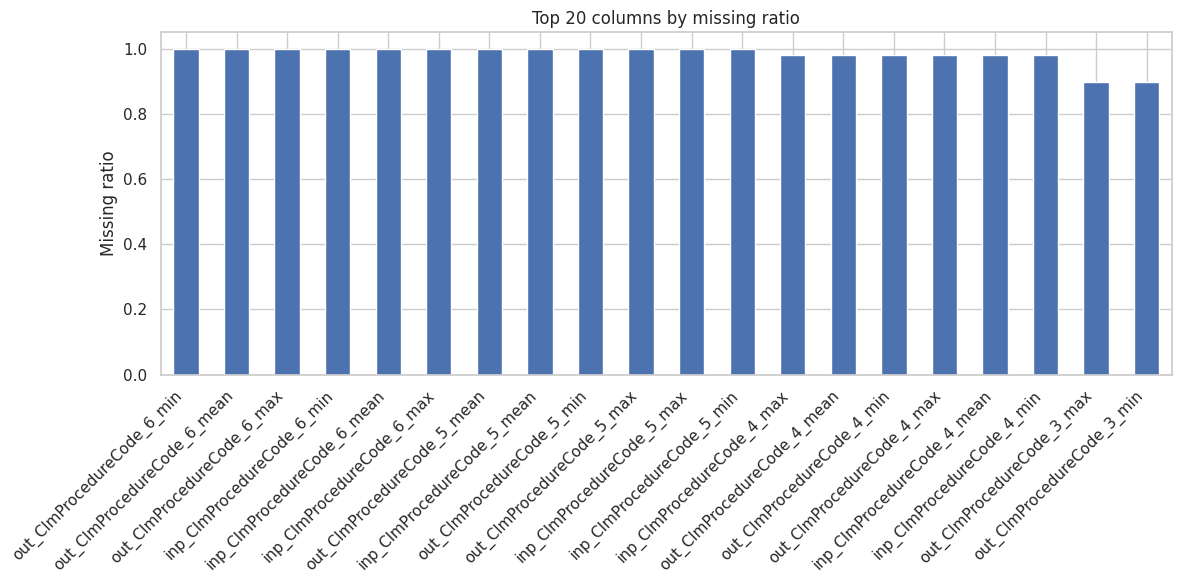


Number of numeric feature columns to impute (excluding Target): 68

Remaining missing values per column (non-zero only):


,0
inp_ClmProcedureCode_6_mean,5410
inp_ClmProcedureCode_6_min,5410
inp_ClmProcedureCode_6_max,5410
out_ClmProcedureCode_6_mean,5410
out_ClmProcedureCode_6_min,5410
out_ClmProcedureCode_6_max,5410



Shape of provider_features_clean: (5410, 70)


,Provider,Target,inp_InscClaimAmtReimbursed_mean,inp_InscClaimAmtReimbursed_sum,inp_InscClaimAmtReimbursed_min,inp_InscClaimAmtReimbursed_max,inp_DeductibleAmtPaid_mean,inp_DeductibleAmtPaid_sum,inp_DeductibleAmtPaid_min,inp_DeductibleAmtPaid_max,...,out_ClmProcedureCode_5_mean,out_ClmProcedureCode_5_sum,out_ClmProcedureCode_5_min,out_ClmProcedureCode_5_max,out_ClmProcedureCode_6_mean,out_ClmProcedureCode_6_sum,out_ClmProcedureCode_6_min,out_ClmProcedureCode_6_max,out_n_claims,out_n_bene
0,PRV51001,No,19400.000000,97000.0,3000.0,42000.0,1068.0,5340.0,1068.0,1068.0,...,4139.0,0.0,4139.0,4139.0,NaN,0.0,NaN,NaN,5.0,5.0
1,PRV51003,Yes,9241.935484,573000.0,0.0,57000.0,1068.0,66216.0,1068.0,1068.0,...,4139.0,0.0,4139.0,4139.0,NaN,0.0,NaN,NaN,62.0,53.0
2,PRV51004,No,9484.693085,77000.0,3000.0,24000.0,1068.0,8544.0,1068.0,1068.0,...,4139.0,0.0,4139.0,4139.0,NaN,0.0,NaN,NaN,8.0,7.0
3,PRV51005,Yes,9484.693085,77000.0,3000.0,24000.0,1068.0,8544.0,1068.0,1068.0,...,4139.0,0.0,4139.0,4139.0,NaN,0.0,NaN,NaN,8.0,7.0
4,PRV51007,No,6333.333333,19000.0,3000.0,10000.0,1068.0,3204.0,1068.0,1068.0,...,4139.0,0.0,4139.0,4139.0,NaN,0.0,NaN,NaN,3.0,3.0


In [9]:
# Block 8: Missing values analysis and basic imputation

# Work on a copy
pf = provider_features.copy()

print("provider_features shape:", pf.shape)

# 1) Missing value summary
missing_counts = pf.isna().sum()
missing_ratio = missing_counts / len(pf)

missing_summary = (
    pd.DataFrame({
        "missing_count": missing_counts,
        "missing_ratio": missing_ratio
    })
    .sort_values("missing_ratio", ascending=False)
)

print("\nTop 30 columns by missing ratio:")
display(missing_summary.head(30))

print("\nOverall missing value statistics:")
print("Number of columns with any missing values:", (missing_counts > 0).sum())
print("Number of columns with no missing values:", (missing_counts == 0).sum())

# Optional: bar plot of missingness for the top 20 most-missing columns
top_missing = missing_summary.head(20)
if len(top_missing) > 0:
    plt.figure(figsize=(12, 6))
    top_missing["missing_ratio"].plot(kind="bar")
    plt.title("Top 20 columns by missing ratio")
    plt.ylabel("Missing ratio")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 2) Simple numeric imputation
#    - Keep Provider and Target as they are
#    - For all other numeric columns, fill missing values with the median

provider_features_clean = pf.copy()

numeric_cols = provider_features_clean.select_dtypes(include="number").columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "Target"]

print("\nNumber of numeric feature columns to impute (excluding Target):", len(numeric_cols))

for col in numeric_cols:
    median_val = provider_features_clean[col].median()
    provider_features_clean[col] = provider_features_clean[col].fillna(median_val)

# Check missing after imputation
missing_after = provider_features_clean.isna().sum()
print("\nRemaining missing values per column (non-zero only):")
display(missing_after[missing_after > 0])

print("\nShape of provider_features_clean:", provider_features_clean.shape)
display(provider_features_clean.head())


Target value counts:
Target
No     4904
Yes     506
Name: count, dtype: int64

Target proportions:
Target
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


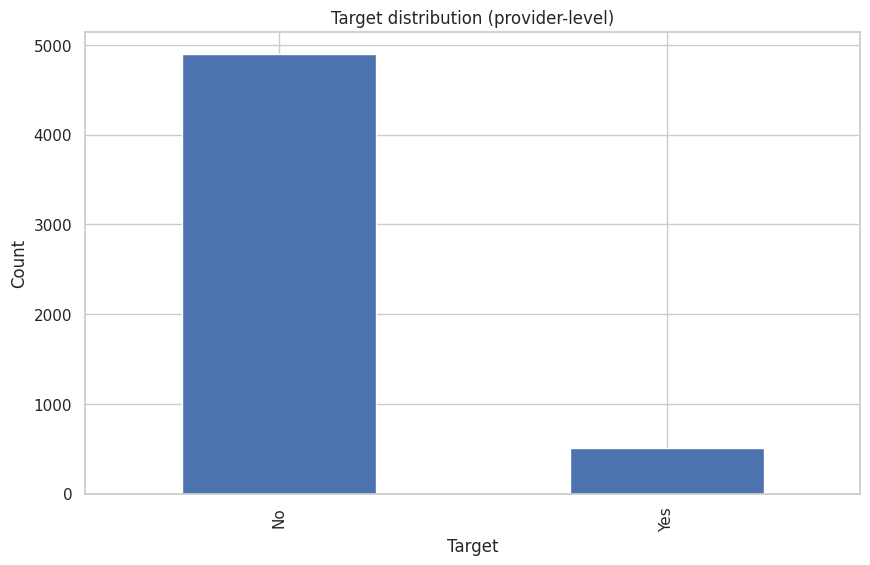


Numeric columns selected for EDA plots:
['inp_n_claims', 'out_n_claims', 'inp_n_bene', 'out_n_bene']


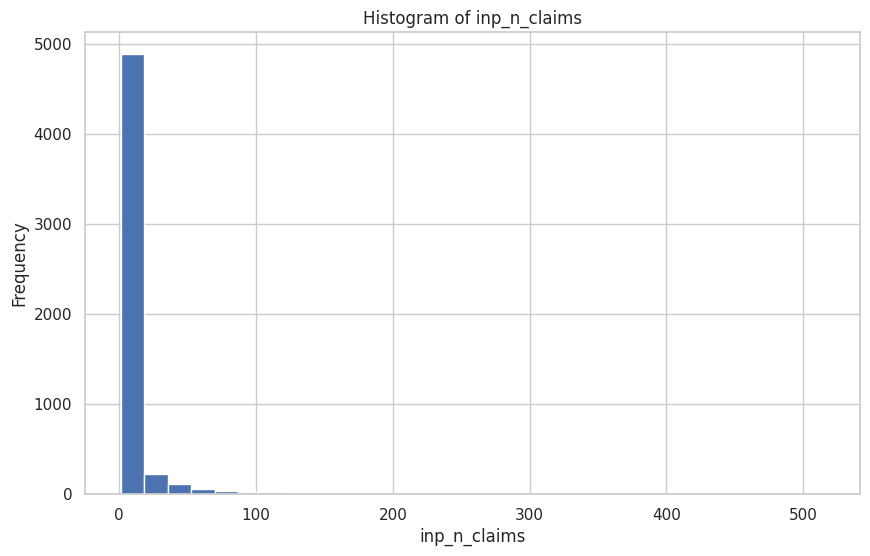

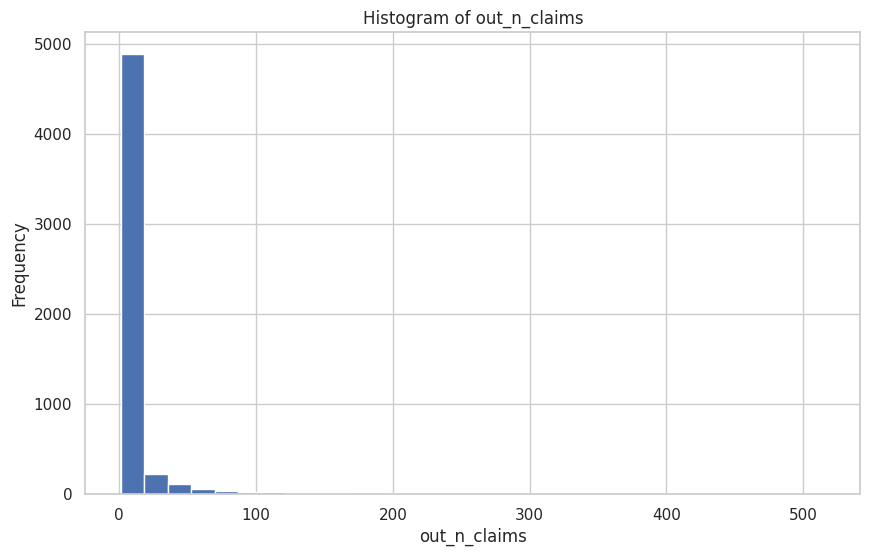

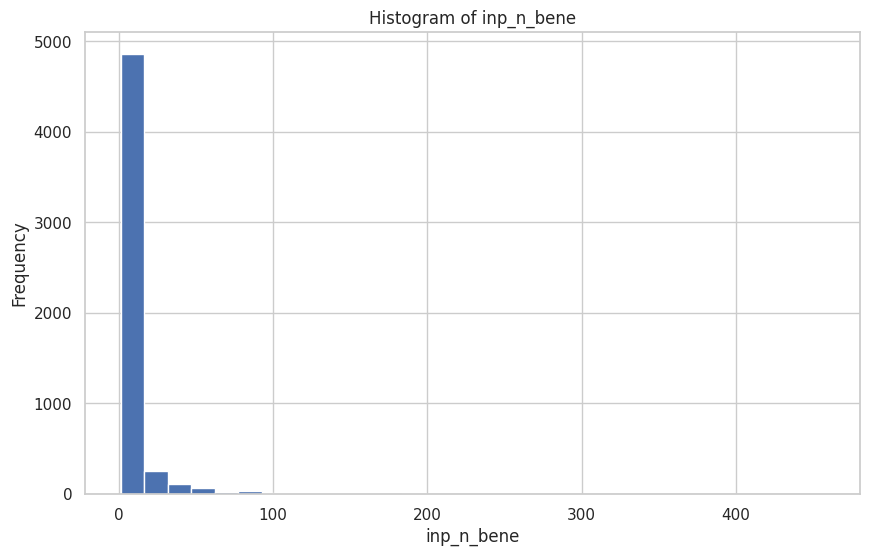

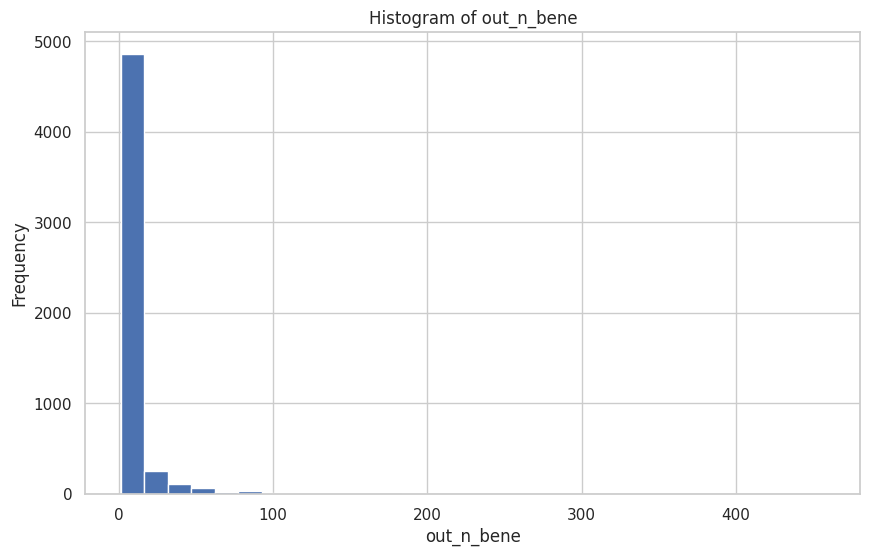

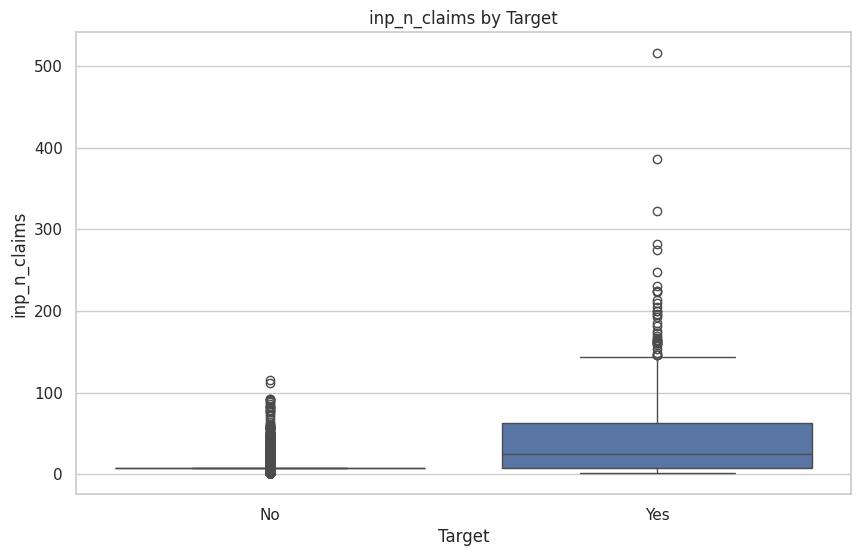

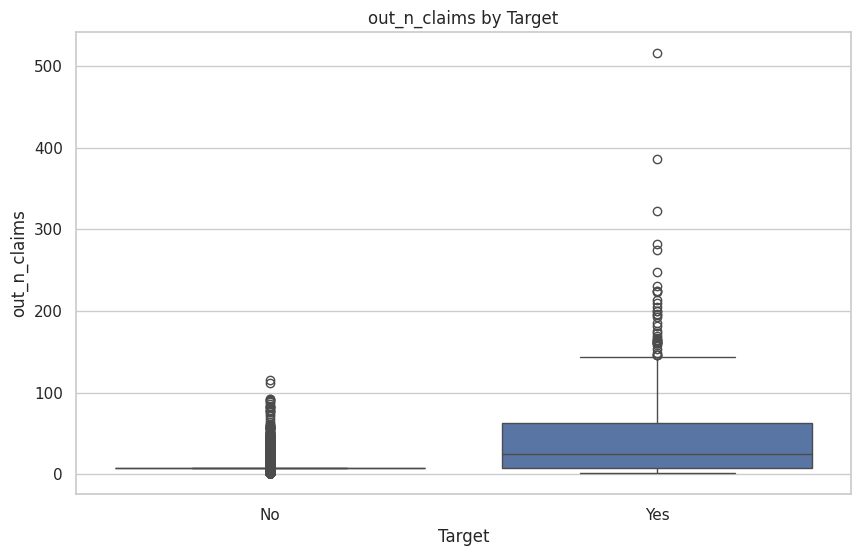

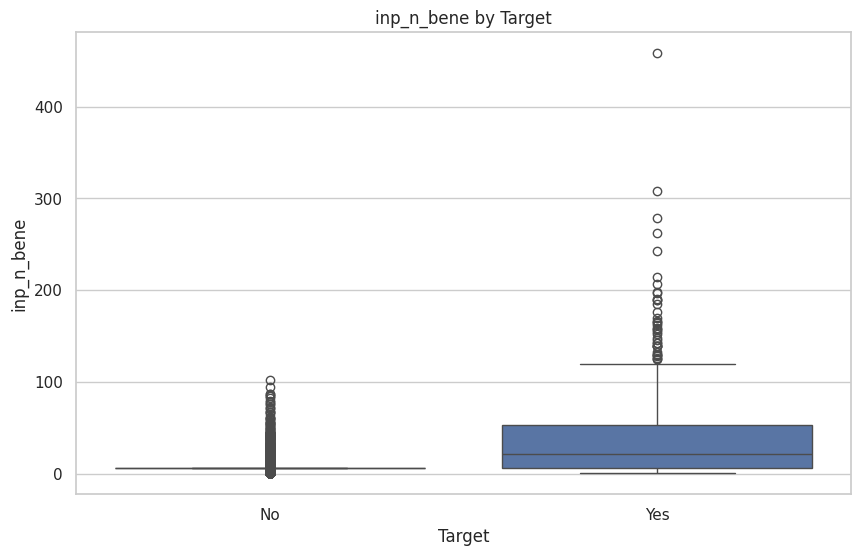

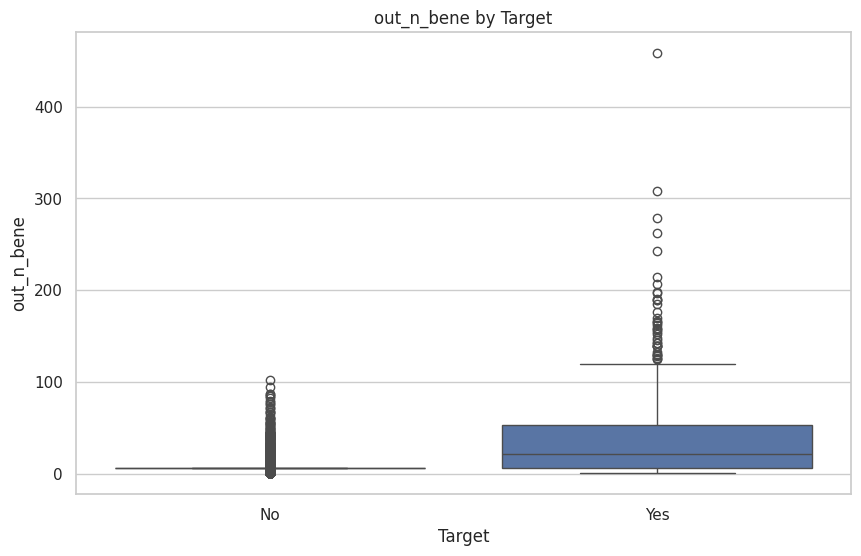


Columns used for correlation heatmap:
['inp_InscClaimAmtReimbursed_mean', 'inp_InscClaimAmtReimbursed_sum', 'inp_InscClaimAmtReimbursed_min', 'inp_InscClaimAmtReimbursed_max', 'inp_DeductibleAmtPaid_mean', 'inp_DeductibleAmtPaid_sum', 'inp_DeductibleAmtPaid_min', 'inp_DeductibleAmtPaid_max', 'inp_ClmProcedureCode_1_mean', 'inp_ClmProcedureCode_1_sum', 'inp_ClmProcedureCode_1_min', 'inp_ClmProcedureCode_1_max', 'inp_ClmProcedureCode_2_mean', 'inp_ClmProcedureCode_2_sum', 'inp_ClmProcedureCode_2_min']

Numeric columns actually used in correlation computation:
['inp_InscClaimAmtReimbursed_mean', 'inp_InscClaimAmtReimbursed_sum', 'inp_InscClaimAmtReimbursed_min', 'inp_InscClaimAmtReimbursed_max', 'inp_DeductibleAmtPaid_mean', 'inp_DeductibleAmtPaid_sum', 'inp_DeductibleAmtPaid_min', 'inp_DeductibleAmtPaid_max', 'inp_ClmProcedureCode_1_mean', 'inp_ClmProcedureCode_1_sum', 'inp_ClmProcedureCode_1_min', 'inp_ClmProcedureCode_1_max', 'inp_ClmProcedureCode_2_mean', 'inp_ClmProcedureCode_2_sum'

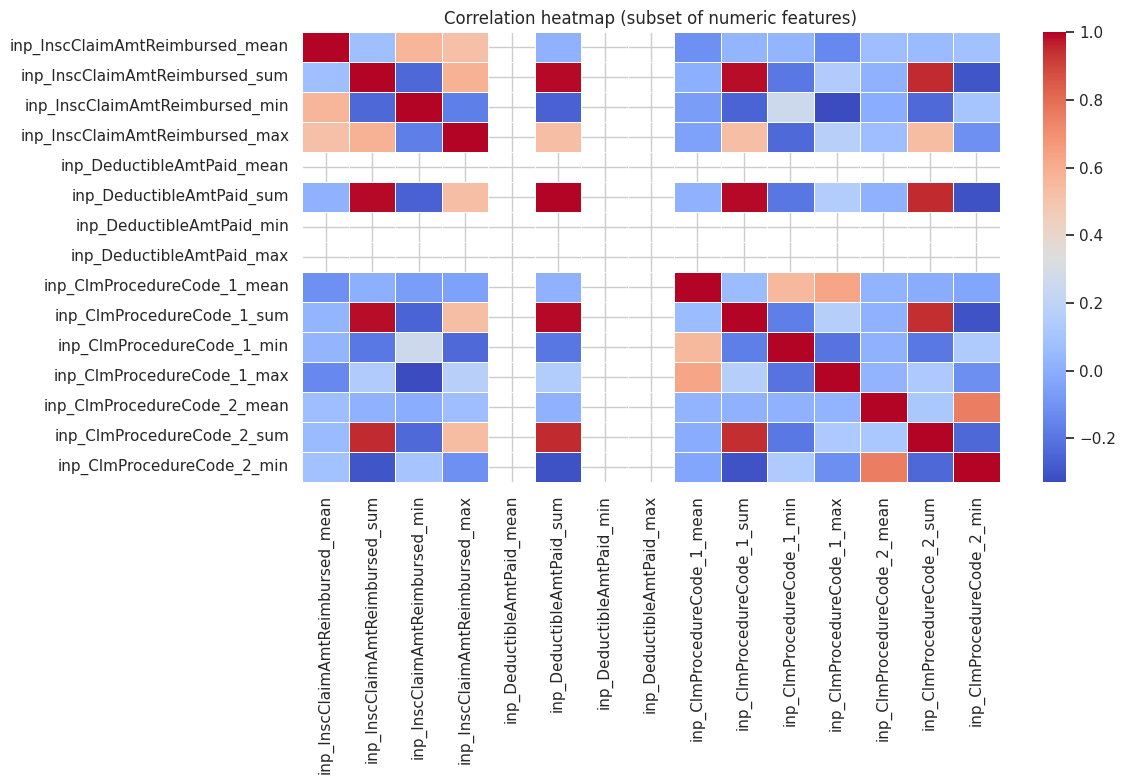

In [10]:
# Block 9: Basic EDA plots on provider_features_clean

df = provider_features_clean.copy()

# 1) Target distribution (again, but from cleaned table)
print("Target value counts:")
print(df["Target"].value_counts())
print("\nTarget proportions:")
print(df["Target"].value_counts(normalize=True))

plt.figure()
df["Target"].value_counts().plot(kind="bar")
plt.title("Target distribution (provider-level)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


# 2) Select a few numeric features for distribution plots
# Try to choose some meaningful columns if they exist
candidate_cols = [
    "inp_n_claims",
    "out_n_claims",
    "inp_n_bene",
    "out_n_bene"
]

numeric_cols = df.select_dtypes(include="number").columns.tolist()
plot_cols = [c for c in candidate_cols if c in numeric_cols]

# If none of the candidate columns exist, just take the first 4 numeric features (excluding Target)
if len(plot_cols) == 0:
    plot_cols = [c for c in numeric_cols if c != "Target"][:4]

print("\nNumeric columns selected for EDA plots:")
print(plot_cols)

# 2.a Histograms for selected numeric features
for col in plot_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 2.b Boxplots of selected numeric features split by Target
for col in plot_cols:
    plt.figure()
    sns.boxplot(x="Target", y=col, data=df)
    plt.title(f"{col} by Target")
    plt.xlabel("Target")
    plt.ylabel(col)
    plt.show()


# 3) Correlation heatmap for a subset of numeric features

# Limit to at most 15 numeric features (excluding Target)
corr_cols = [c for c in numeric_cols if c != "Target"][:15]

print("\nColumns used for correlation heatmap:")
print(corr_cols)

# Build a DataFrame that has only these columns plus Target
corr_df = df[corr_cols + ["Target"]].copy()

# Keep only numeric columns (this drops any accidental non-numeric ones)
corr_numeric = corr_df.select_dtypes(include="number")

print("\nNumeric columns actually used in correlation computation:")
print(list(corr_numeric.columns))

if corr_numeric.shape[1] < 2:
    print("\nNot enough numeric columns for a correlation heatmap.")
else:
    corr = corr_numeric.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation heatmap (subset of numeric features)")
    plt.tight_layout()
    plt.show()


Plotting behavioral differences for: ['inp_InscClaimAmtReimbursed_mean', 'out_InscClaimAmtReimbursed_mean', 'inp_DeductibleAmtPaid_mean', 'out_DeductibleAmtPaid_mean']


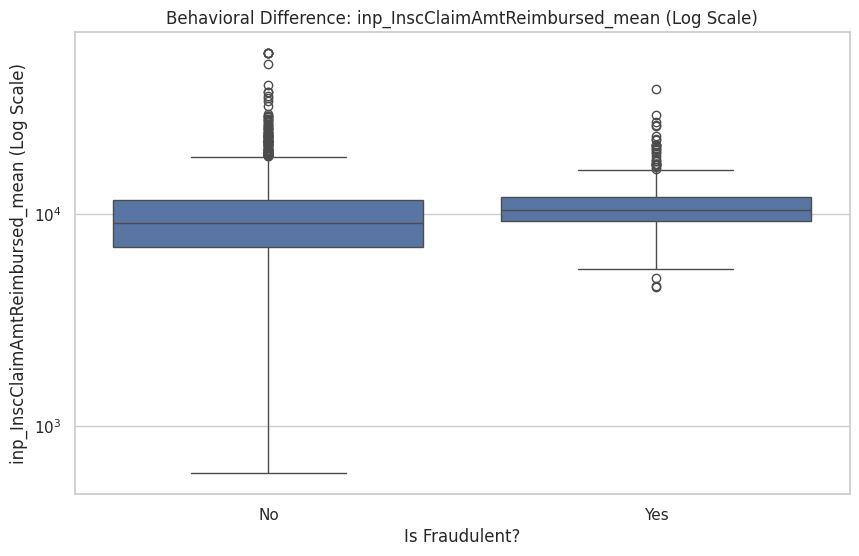

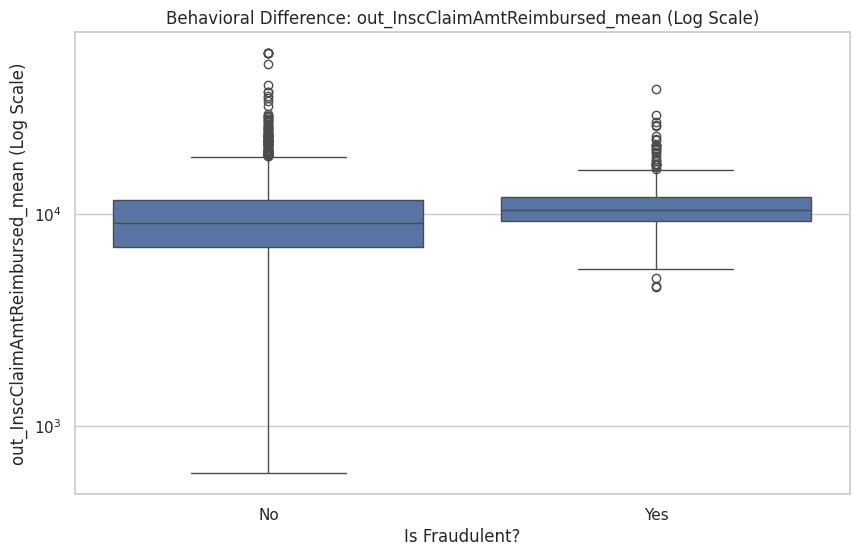

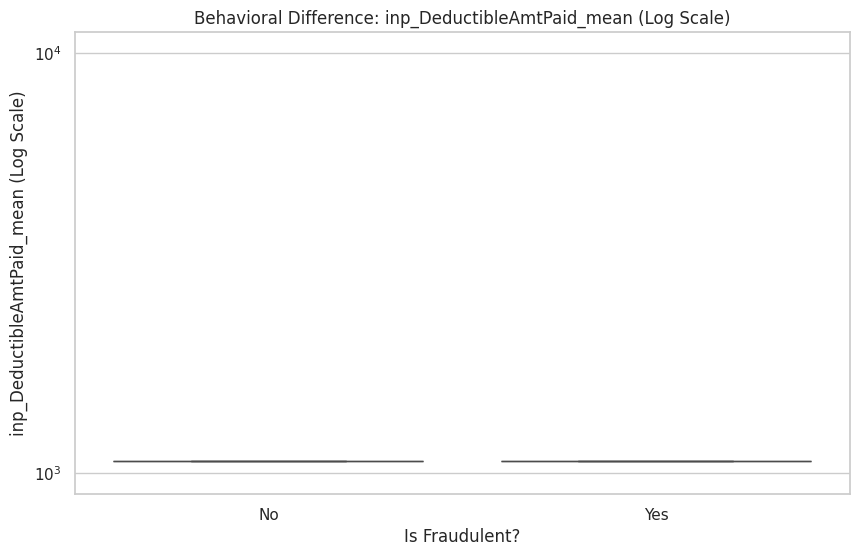

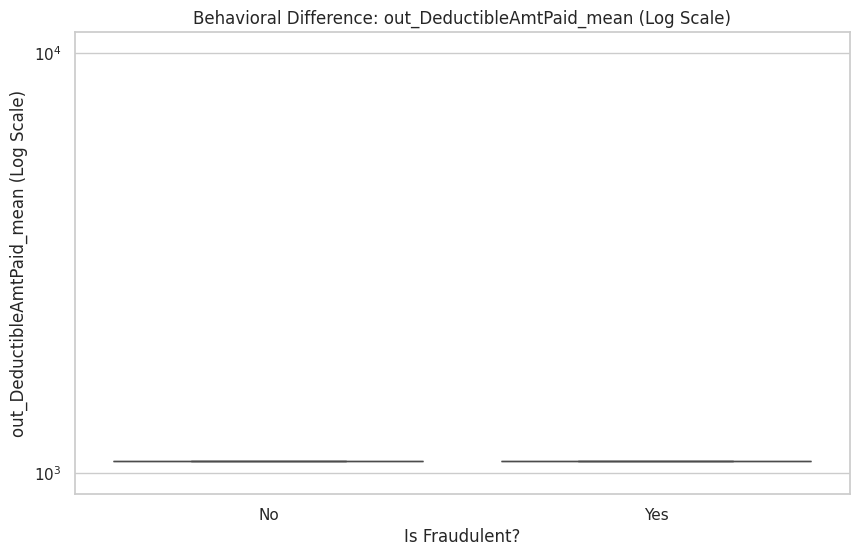

Analysis: PREDICTED BEHAVIOR - Fraudulent providers (Yes) should generally show higher median reimbursements or deductibles compared to non-fraudulent ones.


In [11]:
# --- NEW BLOCK: Behavioral Difference Visualizations ---
import seaborn as sns
import matplotlib.pyplot as plt

# We filter for a few key financial columns to see if Fraudsters charge more
key_features = [
    'inp_InscClaimAmtReimbursed_mean',
    'out_InscClaimAmtReimbursed_mean',
    'inp_DeductibleAmtPaid_mean',
    'out_DeductibleAmtPaid_mean'
]

# Only plot columns that actually exist in our cleaned dataframe
plot_cols = [c for c in key_features if c in provider_features.columns]

print(f"Plotting behavioral differences for: {plot_cols}")

for col in plot_cols:
    plt.figure(figsize=(10, 6))
    # We use log scale because financial data is usually highly skewed
    sns.boxplot(x='Target', y=col, data=provider_features)
    plt.yscale('log')
    plt.title(f'Behavioral Difference: {col} (Log Scale)')
    plt.ylabel(f'{col} (Log Scale)')
    plt.xlabel('Is Fraudulent?')
    plt.show()

print("Analysis: PREDICTED BEHAVIOR - Fraudulent providers (Yes) should generally show higher median reimbursements or deductibles compared to non-fraudulent ones.")

In [12]:
# Block 10: Save cleaned provider-level dataset for modeling

import json
from pathlib import Path

# Directory to store processed data
output_dir = Path("processed_data")
output_dir.mkdir(exist_ok=True)

# 1) Save the main cleaned table
provider_features_clean_path = output_dir / "provider_features_clean.csv"
provider_features_clean.to_csv(provider_features_clean_path, index=False)

print("Saved provider_features_clean to:")
print(provider_features_clean_path.resolve())

# 2) Save simple metadata (which column is target, which is ID, etc.)
metadata = {
    "id_column": "Provider",
    "target_column": "Target",
    "feature_columns": [c for c in provider_features_clean.columns
                        if c not in ["Provider", "Target"]]
}

metadata_path = output_dir / "features_metadata.json"
with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent=2)

print("\nSaved metadata to:")
print(metadata_path.resolve())

print("\nNumber of features (excluding ID and target):", len(metadata["feature_columns"]))


Saved provider_features_clean to:
/content/processed_data/provider_features_clean.csv

Saved metadata to:
/content/processed_data/features_metadata.json

Number of features (excluding ID and target): 68


# Summary
- Loaded raw data
- Cleaned missing values
- Aggregated claims per provider
- Engineered 60+ statistical features
- Saved clean dataset
